# Decorators

### * Decorators are logical pattern that are used to modify or add to the behaviour of a function or a class.
### * Decorators allows us to wrap a function in order to extend the behaviour of the wrapped function, without permanently modifying it.
### It can be used to add functionality to functions that imported from a module, hence allowing you to follow DRY principle.

## Before we learn about Decorators let's understand some concepts about functions in Python. 

__* Python Functions__ are __First Class Objects__:

First Clas Objects are treated same throughout the program in a language that supports this concept. Python supports First Class Object concept for functions hence Python functions are also called as __First Class Functions.__

__* Properties of First Class Function:__
1. A function is an instance of type Object.
2. A function can be stored inside a variable
3. A function can be passed to another function as argument (only the name of function i.e function object) 
4. A function can be returned from another function ( i.e function object)
5. A function can be stored inside data structures such as hash tables, list,....

## Lets start exploring these properties.

## 2. A function can be stored inside a variable

In [1]:
def plus_1(x):
    return x+1

var_a= plus_1

In [2]:
print(type(var_a))
print(repr(var_a)) #repr() gives official information i.e all the information about an object
print(str((var_a))) #str() gives unofficial information i.e only the information that is readable for end user.
# both print() and str() call __str__() method for giving text version of the object
print(repr(plus_1))

a=var_a(1)
a

<class 'function'>
<function plus_1 at 0x000001D6C545E940>
<function plus_1 at 0x000001D6C545E940>
<function plus_1 at 0x000001D6C545E940>


2

----------

In [3]:
# example of use case of repr()
import datetime
today=datetime.datetime.now()
print(str(today))
print(repr(today))

2023-01-16 03:56:48.264775
datetime.datetime(2023, 1, 16, 3, 56, 48, 264775)


#repr() gives official information i.e all the information about an object

#str() gives unofficial information i.e only the information that is readable for end user.

#both print() and str() call __str__() method for giving text version of the object

-----------

# 3. A function can be passed to another function as an argument.

In [4]:
def plus_1(num):
    return num+1
def function_call(func):
    number=5
    return func(number)

function_call(plus_1)
    

6

* Here we are returning result of called function (func(number)) and not instance of function.

# 4. A function can return/generate another function

In [5]:
def hello_function():
    def say_hi():
        return "Hi"
    return say_hi

hello=hello_function()
hello()
        

'Hi'

* Here we have defined a function inside another function and then  returned its instance from outer enclosing function function.

# 5. You can store functions inside data structures

In [6]:
list_func=[plus_1,hello_function]
function=list_func[0]
print(function(5))
function=list_func[1]#this returns hello_function object
result=function()#this calling gives say_hi object
print(result())


6
Hi


----------------------------------------------------

# DECORATORS


As discussed earlier Decorators are logical pattern that add to the behaviour of a function or a class.

Decorators consists of: 
>A decorator function: That returns the wrapper function which adds to the behaviour of base function.

> A wrapper function: This is the function that intake the base function, performs some opertaion then returns the result.

So whenever we call decorator on any base function we are simply passing the function to decorator function that then passes the base function to a wrapper/modifier which add to the behaviour of base function and returns the result. The decorator returns the wrapper object containing all the variables and operation to be performed. 

Below is the steps of execution: 

Note: inner1() is the wrapper function and hello_decorator() is the decorator function.

A nested function (i.e inner1()) has access to the namespace (i.e all arguments and variables) of enclosing function (i.e hello_decorator()).


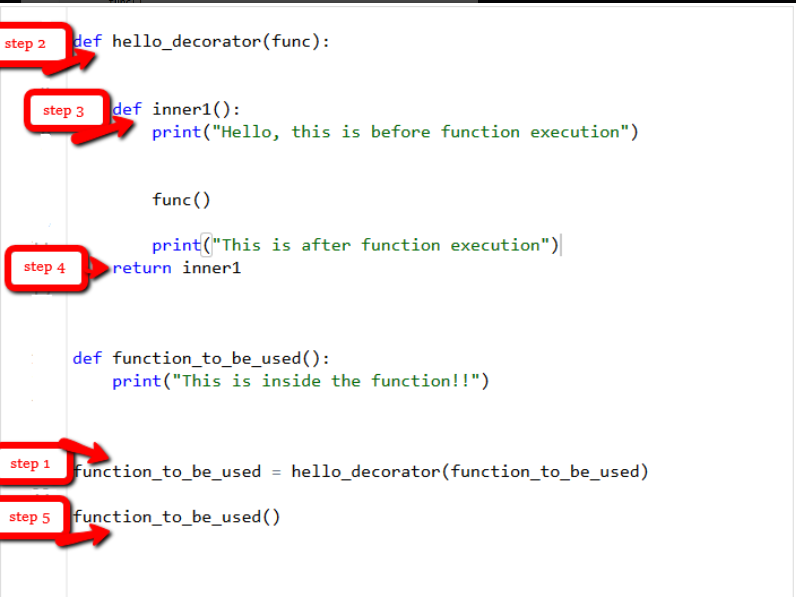

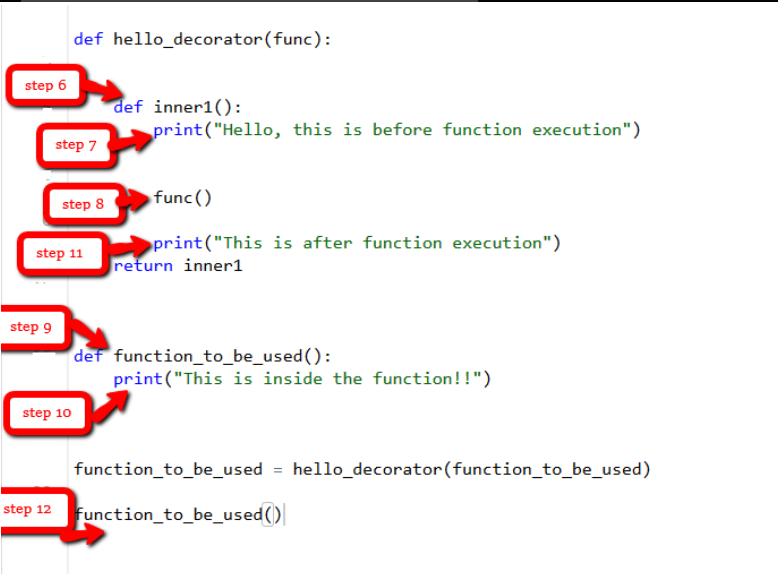

In [7]:
def uppercase_decorator(function): #decorator function
    print('Inside the decorator')
    def wrapper():
        print('Inside the wrapper')
        func=function()
        make_upper=func.upper()
        return make_upper
    print('Outside the wrapper')
    return wrapper

def say_hi(): #base function
    print('This is inside the base function: Hi')
    return "Hi"

### There are two way to apply decorators to a base function.
### 1. Method 1: calling decorator function

In [8]:
decorate=uppercase_decorator(say_hi)
decorate()

Inside the decorator
Outside the wrapper
Inside the wrapper
This is inside the base function: Hi


'HI'

In [9]:
say_hi()

This is inside the base function: Hi


'Hi'

* Method 1 keeps the original base function intact which can be used again as before.

### 2. Method 2: using direcorator syntax

Python provides an easy way to apply decorators by using '@' symbol and decorator name.

In [10]:
@uppercase_decorator
def say_hi():
    return 'Hi!!'
say_hi()

Inside the decorator
Outside the wrapper
Inside the wrapper


'HI!!'

In [11]:
say_hi()

Inside the wrapper


'HI!!'

* As we can see wrapper is what modifies the behaviour of the base function and purpose of decorator is only to return the modified base function (i.e wrapper function). Hence if we wish to pass argument to the decorator, we need to pass the arguments in wrapper function.

------------

### Applying multiple decorators: Order of decorator matters in such case.

In [13]:
def split_string(function):
    def wrapper():
        func = function()
        splitted_string = func.split()
        return splitted_string

    return wrapper

@split_string
@uppercase_decorator
def say_hi():
    return 'hello there'
say_hi()

Inside the decorator
Outside the wrapper
Inside the wrapper


['HELLO', 'THERE']

In [14]:
say_hi()

Inside the wrapper


['HELLO', 'THERE']

As we can see decorator is called only once to return the modified base function in our program, after that only modified based function called. Hence it is adivsed not to print anything in decorator.

-------------------------

### Accepting Arguments in Decorator Functions

In [22]:
def decorator_with_arguments(function):
    def wrapper_accepting_arguments(arg1, arg2):
        print("My arguments are: {0}, {1}".format(arg1,arg2))
        function(arg1, arg2)
    return wrapper_accepting_arguments


def cities(city_one, city_two):
    print("Cities I love are {0} and {1}".format(city_one, city_two))

In [23]:
decorated_cities=decorator_with_arguments(cities)
decorated_cities("Nairobi", "Accra")

My arguments are: Nairobi, Accra
Cities I love are Nairobi and Accra


In [24]:
cities("Nairobi", "Accra")

Cities I love are Nairobi and Accra


In [25]:
@decorator_with_arguments
def cities(city_one, city_two):
    print("Cities I love are {0} and {1}".format(city_one, city_two))

cities("Nairobi", "Accra")

My arguments are: Nairobi, Accra
Cities I love are Nairobi and Accra


### It is clear that purpose of decorator is only to return modified base function object.

------

### Defining General Purpose Decorators

In [26]:
def a_decorator_passing_arbitrary_arguments(function_to_decorate):
    def a_wrapper_accepting_arbitrary_arguments(*args,**kwargs):
        print('The positional arguments are', args)
        print('The keyword arguments are', kwargs)
        function_to_decorate(*args)
    return a_wrapper_accepting_arbitrary_arguments

@a_decorator_passing_arbitrary_arguments
def function_with_no_argument():
    print("No arguments here.")

function_with_no_argument()

The positional arguments are ()
The keyword arguments are {}
No arguments here.


-------------

### Passing Arguments to the Decorator: Here we need a decorator maker that accepts argument then makes those arguments available to decorator and wrapper.

In [27]:
def decorator_maker_with_arguments(decorator_arg1, decorator_arg2, decorator_arg3):
    def decorator(func):
        def wrapper(function_arg1, function_arg2, function_arg3) :
            "This is the wrapper function"
            print("The wrapper can access all the variables\n"
                  "\t- from the decorator maker: {0} {1} {2}\n"
                  "\t- from the function call: {3} {4} {5}\n"
                  "and pass them to the decorated function"
                  .format(decorator_arg1, decorator_arg2,decorator_arg3,
                          function_arg1, function_arg2,function_arg3))
            return func(function_arg1, function_arg2,function_arg3)

        return wrapper

    return decorator

pandas = "Pandas"
@decorator_maker_with_arguments(pandas, "Numpy","Scikit-learn")
def decorated_function_with_arguments(function_arg1, function_arg2,function_arg3):
    print("This is the decorated function and it only knows about its arguments: {0}"
           " {1}" " {2}".format(function_arg1, function_arg2,function_arg3))

decorated_function_with_arguments(pandas, "Science", "Tools")

The wrapper can access all the variables
	- from the decorator maker: Pandas Numpy Scikit-learn
	- from the function call: Pandas Science Tools
and pass them to the decorated function
This is the decorated function and it only knows about its arguments: Pandas Science Tools


# Python itself provides several decorators: property, staticmethod, etc.